한국어 Word2Vec 만들기(네이버 뉴스)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import re
from gensim.models import FastText
from eunjeon import Mecab

In [2]:
# 상폐기업 = pd.read_csv('./data/상폐기업뉴스.csv')
정상기업 = pd.read_csv('./정상_새로합친거.csv',index_col=0)


In [3]:
data=정상기업
# data=pd.concat([상폐기업, 정상기업], axis = 0)
# data=pd.concat([상폐기업, 정상기업], axis = 0)

In [14]:
data.reset_index(inplace=True)

In [17]:
data.drop("index",inplace=True,axis=1)

In [18]:
data

,기업,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문
0,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...,NaN
1,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...,NaN
2,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...,NaN
3,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN
4,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN
...,...,...,...,...,...
6741,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...,에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진=에이치엘비\n에이치...
6742,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...,[서울=뉴시스] 에이치엘비 CI\n\n\n[서울=뉴시스] 김제이 기자 = 에이치엘비...
6743,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...,[한국경제TV 김정필 IT벤처팀장]\n\n\n-168·252kW급 수소연료전지선박 ...
6744,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...,"코스닥지수, 지난해 말 대비 44.6% 상승\n개인 비중 88.2%로 확대…거래량 ..."


In [5]:
time=data["기사발행일"].str.split('.').tolist()
time_df=pd.DataFrame(time,columns=['년','월','일','시간'])
time_df.drop("시간",axis=1,inplace=True)

In [6]:
time_df

,년,월,일
0,2011,08,16
1,2011,06,08
2,2011,06,07
3,2011,03,12
4,2011,03,11
...,...,...,...
6741,2020,09,22
6742,2020,09,21
6743,2020,12,04
6744,2020,12,30


In [19]:
time_data=pd.concat([time_df,data],axis=1)
# time_data["기사제목"].groupby(time_data["년"]).count()
# time_data

In [20]:
# time_data.groupby(["기업","년"]).sum()
# time_data_1=time_data.groupby(["기업","년"]).sum()
# time_data_1

In [25]:
time_data.drop("뉴스기사본문",inplace=True,axis=1)

In [26]:
time_data

,년,월,일,기업,기사발행일,기사제목,뉴스기사본문전처리
0,2011,08,16,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...
1,2011,06,08,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...
2,2011,06,07,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...
3,2011,03,12,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...
4,2011,03,11,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...
...,...,...,...,...,...,...,...
6741,2020,09,22,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...
6742,2020,09,21,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...
6743,2020,12,04,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...
6744,2020,12,30,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...


In [27]:
print(len(time_data))  # 기사 개수 출력

6746


In [28]:
# NULL 값 존재 유무
print(time_data.isnull().values.any())

False


In [29]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [30]:
# 형태소 분석기 mecab를 사용한 토큰화 작업 (다소 시간 소요)

mecab = Mecab()
tokenized_data = []
output=[]
for sentence in data['뉴스기사본문전처리']:
    temp_X = mecab.nouns(sentence)  # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거

    tokenized_data.append(temp_X)


한글자제거

In [31]:
remove_one_word=[]
for j in range(len(tokenized_data)):
    a=[x for x in tokenized_data[j] if len(x)>1]
    remove_one_word.append(a)
    

In [ ]:
len(remove_one_word)
list_text_1=sum(remove_one_word, [])

In [ ]:
from collections import Counter

In [ ]:
횟수=Counter(list_text_1)
횟수['폐지']
# for i in range(len(list_text_1)):
    
# print(Counter(list_text_1))

70

기사의 길이 및 분포 확인

기사의 최대 길이 : 2042
기사의 평균 길이 : 184.18307144974798


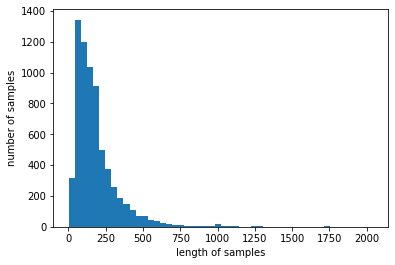

In [32]:
# 기사 길이 분포 확인

print('기사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show();

word2vec훈련

In [35]:
time_data['뉴스기사 레이블']=time_data['기사제목']

뉴스기사 레이블 시키기

In [36]:
keywords=["퇴출","재심사","실질","폐지"]
for i in range(len(time_data)):
    if any(keyword in str(time_data["뉴스기사본문전처리"][i]) for keyword in keywords)==True:
        time_data['뉴스기사 레이블'][i]=1
    else:
        time_data['뉴스기사 레이블'][i]=0

In [37]:
time_data['뉴스기사 레이블'].sum()

259

In [42]:
time_data.drop(["월","일"],inplace=True,axis=1)

In [47]:
df=time_data.groupby(["기업","년"]).sum()
df.drop("기사발행일",inplace=True,axis=1)

In [51]:
df

,,기사제목,뉴스기사본문전처리,뉴스기사 레이블
기업,년,,,
경창산업,2013,"경창산업 ""내가 진짜 中수혜주"" 연초 대비 125%↑[특징주]경창산업, 3분기 호실...",자동차 부품업체 경창산업이 올해 분기 호실적을 기록하자 신고가를 다시 쓰며 급등세를...,3
고영테크놀러지,2011,"고영테크, 10만주 규모 신주인수권 행사고영, 연 50% 성장 세계 1위…주가가 성...",고영테크놀러지는 만주의 신주인수권을 행사한다고 일 공시했다. 이는 발행주식총수 대비...,1
광림,2016,"거래소, 광림 주가급등 조회공시 요구나노스, 최대주주 광림 외 1명으로 변경광림 ""...",김현정 기자 한국거래소는 코스닥 상장사 광림에 최근 주가급등과 관련한 조회공시를...,0
금화피에스시,2013,"금화피에스시, 134억원 규모 복합화력발전소 폐열회수장치 교체공사 수주금화피에스시,...",금화피에스시는 현대건설로부터 복합화력발전소 폐열회수장치 교체공사를 수주했다고 일 ...,12
나스미디어,2017,"[fnRASSI]나스미디어, 52주 신고가...3.22% ↑[ET투자뉴스][나스미디...",나스미디어는 주신고가를 기록하고 있어 주목할만하다. 동종목의 현재 주가는 원 선에서...,0
...,...,...,...,...
하이록코리아,2012,"[특징주] 하이록코리아, 급락 하루만에 반등…""눈높이 낮출 이유 없다""""피팅주 주식...",하이록코리아가 눈높이를 낮출 이유가 없다는 증권사의 분석에 급락 하루만에 상승 반등...,1
한국정보통신,2015,"한국정보통신, 최대주주 변경 주식 담보제공 계약 체결[특징주]한국정보통신, 中알리페...",한국정보통신은 박헌서 한국정보통신 회장이 최대주주 변경을 수반하는 주식 담보제공 ...,0
해성산업,2013,<생생코스닥>해성산업，주당 100원 현금배당 결정<표> 코스닥 외국인 순매수도 상위...,해성산업은 보통주 주당 원의 현금배당을 결정했다고 일 공시했다.시가배당률 .이며 배...,2


In [50]:
df_count=time_data.groupby(["기업","년"]).count()
df_count

,,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사 레이블
기업,년,,,,
경창산업,2013,60,60,60,60
고영테크놀러지,2011,46,46,46,46
광림,2016,55,55,55,55
금화피에스시,2013,70,70,70,70
나스미디어,2017,69,69,69,69
...,...,...,...,...,...
하이록코리아,2012,69,69,69,69
한국정보통신,2015,22,22,22,22
해성산업,2013,20,20,20,20


In [52]:
df["부도기사 비율"]=df["뉴스기사 레이블"]

In [54]:
df["부도기사 비율"]=round(df["뉴스기사 레이블"]/df_count["뉴스기사 레이블"]*100,2)
final_df=pd.DataFrame(df["부도기사 비율"])
final_df.to_csv("fasttext_mecab_정상기업_부도기사 비율.csv",encoding="utf-8-sig")
final_df

,,부도기사 비율
기업,년,
경창산업,2013,5.00
고영테크놀러지,2011,2.17
광림,2016,0.00
금화피에스시,2013,17.14
나스미디어,2017,0.00
...,...,...
하이록코리아,2012,1.45
한국정보통신,2015,0.00
해성산업,2013,10.00


In [ ]:
time_data_1["부도기사 비율"]=round(sum_df["뉴스기사 레이블"]/time_data_1["뉴스기사 레이블"]*100,2)
final_df=pd.DataFrame(time_data_1["부도기사 비율"])
final_df.to_csv("정상기업_부도기사 비율.csv",encoding="utf-8-sig")
final_df

,,부도기사 비율
기업,년,
경창산업,2013,6.67
고영테크놀러지,2011,12.00
광림,2016,0.00
금화피에스시,2013,33.33
나스미디어,2017,4.00
...,...,...
하이록코리아,2012,6.45
한국정보통신,2015,0.00
해성산업,2013,14.29


In [ ]:
plor=["폐지","퇴출","기로","벼랑"]
a="|".join(plor)
df=train_data[train_data['뉴스기사본문전처리'].str.contains(a)]

len(df)


241

s

In [ ]:
import pandas as pd